In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
start_date = datetime(2010, 1, 1)
end_date = datetime(2022, 12, 31)

In [3]:
stock_data = yf.download('AAPL',start=start_date,end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478997,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386966,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375154,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417540,447610800


In [5]:
stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.127060,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.307236,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.339409,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,128.889572,75703700
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.207779,77034200


In [6]:
stock_data = stock_data.reset_index()

In [7]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478997,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386966,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375154,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417540,447610800


In [8]:
stock_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3267,2022-12-23,130.919998,132.419998,129.639999,131.860001,131.127060,63814900
3268,2022-12-27,131.380005,131.410004,128.720001,130.029999,129.307236,69007800
3269,2022-12-28,129.669998,131.029999,125.870003,126.040001,125.339409,85438400
3270,2022-12-29,127.989998,130.479996,127.730003,129.610001,128.889572,75703700
3271,2022-12-30,128.410004,129.949997,127.430000,129.929993,129.207779,77034200


In [9]:
stock_data.drop(['Date','Adj Close'],axis=1,inplace=True)

In [10]:
stock_data.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


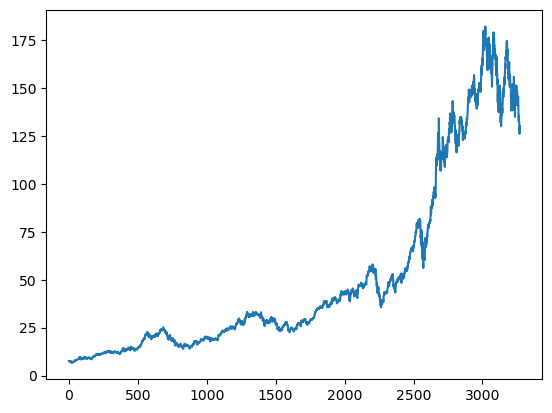

In [11]:
plt.plot(stock_data['Close'])

In [12]:
ma100 = stock_data.Close.rolling(100).mean()

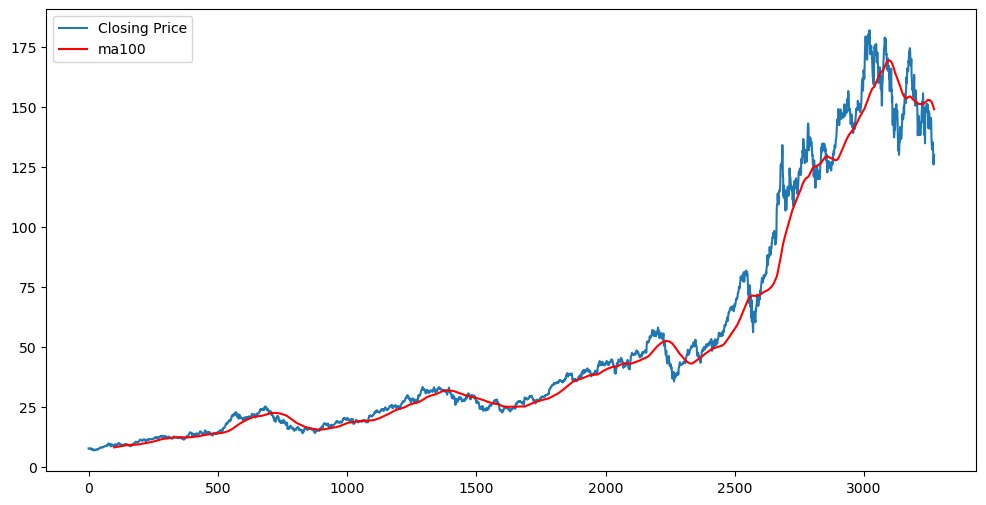

In [13]:
plt.figure(figsize=(12,6))
plt.plot(stock_data['Close'])
plt.plot(ma100,c = 'r')
plt.legend(['Closing Price','ma100'])

In [14]:
ma200 = stock_data.Close.rolling(200).mean()

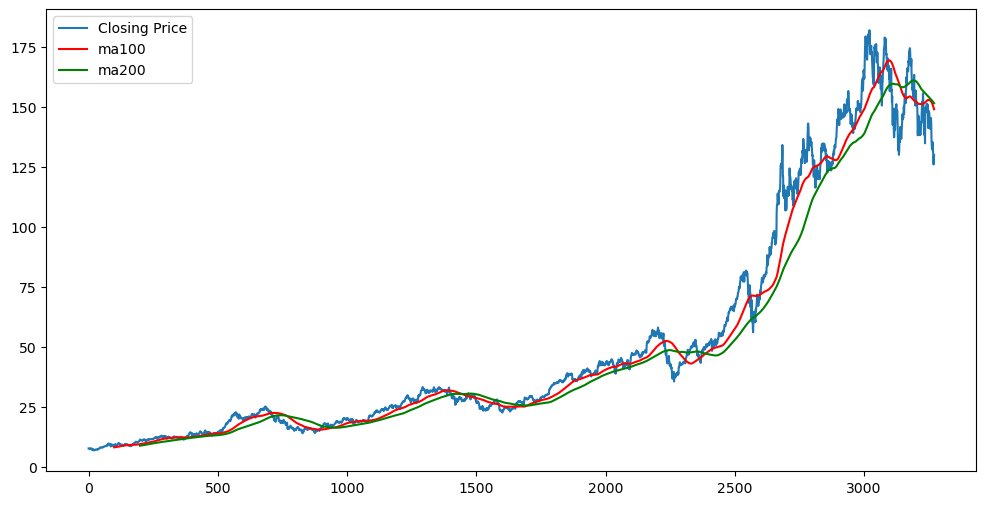

In [15]:
plt.figure(figsize=(12,6))
plt.plot(stock_data['Close'])
plt.plot(ma100,c = 'r')
plt.plot(ma200,c = 'g')
plt.legend(['Closing Price','ma100','ma200'])

In [16]:
stock_data.shape

(3272, 5)

In [17]:
trained_data = pd.DataFrame(stock_data['Close'][:int(len(stock_data)*0.70)])
test_data = pd.DataFrame(stock_data['Close'][int(len(stock_data)*0.70):])

In [18]:
trained_data.shape

(2290, 1)

In [19]:
test_data.shape

(982, 1)

In [20]:
scalar = MinMaxScaler(feature_range=(0,1))

In [21]:
transformed_train_data = scalar.fit_transform(trained_data)

In [22]:
transformed_train_data

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.71710501],
       [0.71739828],
       [0.70127194]])

In [23]:
transformed_train_data.shape

(2290, 1)

In [24]:
X_train = []
Y_train = []

In [25]:
for i in range(100,transformed_train_data.shape[0]):
  X_train.append(transformed_train_data[i-100:i])
  Y_train.append(transformed_train_data[i, 0])

In [26]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [27]:
X_train.shape

(2190, 100, 1)

# **Training using the LSTM(Long Short Term Memory) Deep Learning Model**

In [28]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [29]:
model = Sequential()
model.add(LSTM(units=50, activation='relu',return_sequences=True,input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

In [30]:
model.add(LSTM(units=60, activation='relu',return_sequences=True))
model.add(Dropout(0.3))

In [31]:
model.add(LSTM(units=80, activation='relu',return_sequences=True))
model.add(Dropout(0.4))

In [32]:
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

In [33]:
model.add(Dense(units=1))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [35]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,Y_train,epochs=50)


Epoch 1/50

69/69 [==============================] - 11s 100ms/step - loss: 0.0317
Epoch 2/50
69/69 [==============================] - 7s 98ms/step - loss: 0.0071
Epoch 3/50
69/69 [==============================] - 7s 98ms/step - loss: 0.0050
Epoch 4/50
69/69 [==============================] - 7s 104ms/step - loss: 0.0057
Epoch 5/50
69/69 [==============================] - 8s 110ms/step - loss: 0.0050
Epoch 6/50
69/69 [==============================] - 8s 112ms/step - loss: 0.0039
Epoch 7/50
69/69 [==============================] - 8s 109ms/step - loss: 0.0047
Epoch 8/50
69/69 [==============================] - 8s 110ms/step - loss: 0.0041
Epoch 9/50
69/69 [==============================] - 7s 108ms/step - loss: 0.0038
Epoch 10/50
69/69 [==============================] - 7s 105ms/step - loss: 0.0038
Epoch 11/50
69/69 [==============================] - 7s 102ms/step - loss: 0.0033
Epoch 12/50
69/69 [==============================] - 7s 103ms/step - loss: 0.0036
Epoch 13/50
69/69 [=====

In [36]:
model.save('lstm.h5')

c:\Users\Harshavardhan Sathe\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
test_data.head()

,Close
2290,42.602501
2291,42.357498
2292,42.722500
2293,42.544998
2294,42.700001


In [38]:
past_100_days = trained_data.tail(100)

In [39]:
final = past_100_days.append(test_data,ignore_index=True)

C:\Users\Harshavardhan Sathe\AppData\Local\Temp\ipykernel_23260\3855878123.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = past_100_days.append(test_data,ignore_index=True)


In [40]:
final.head()

,Close
0,55.959999
1,54.470001
2,54.560001
3,54.592499
4,55.007500


In [41]:
input_data = scalar.fit_transform(final)

In [42]:
input_data.shape

(1082, 1)

In [43]:
X_test = []
Y_test = []

In [44]:
for i in range(100,input_data.shape[0]):
  X_test.append(input_data[i-100:i])
  Y_test.append(input_data[i, 0])

In [45]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [46]:
print(X_test.shape)
print(Y_test.shape)

(982, 100, 1)
(982,)


# ***Predictions***

In [47]:
Y_predict = model.predict(X_test)

31/31 [==============================] - 2s 33ms/step


In [48]:
Y_predict.shape

(982, 1)

In [49]:
factor = scalar.scale_

In [50]:
factor = 1/0.00682769

In [51]:
Y_predict = Y_predict * factor
Y_test = Y_test * factor

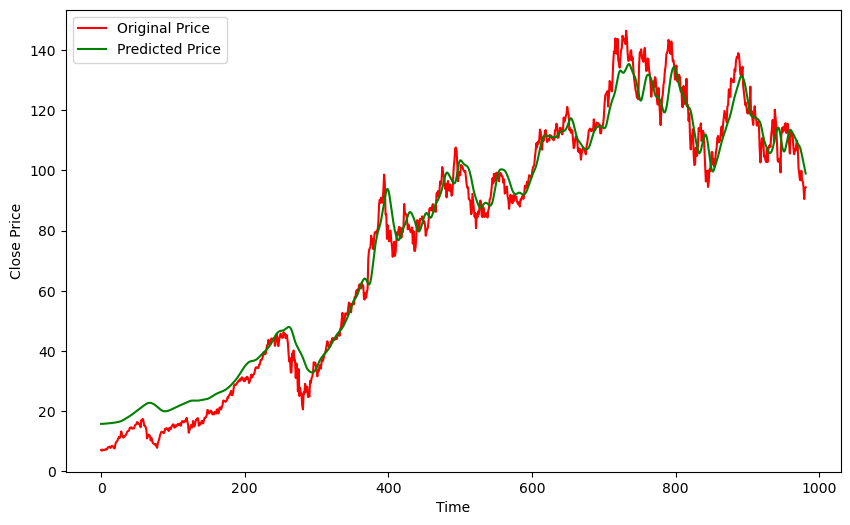

In [52]:
plt.figure(figsize = (10,6))
plt.plot(Y_test,c = 'r',label = 'Original Price')
plt.plot(Y_predict,c = 'g',label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()